# Demonstration of attention map for CLIP embeddings

In this notebook we demonstrate how to display the attention maps derived from the CLIP embeddings

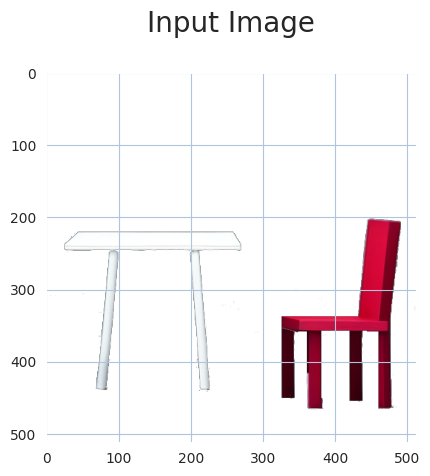

In [1]:
# Standard imports
import seaborn as sns
import matplotlib.pyplot as plt
import imageio, importlib
from PIL import Image
from IPython.display import HTML
import torch.nn.functional as F


import numpy as np
import nopdb
import math, torch
from tqdm.auto import tqdm

import sys

# Detect local paths
local_path = !pwd
local_path = local_path[0][:-5]
sys.path.append(local_path + 'src/')

# Import modules from point_e
from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud
from point_e.util.plotting import plot_attention_cloud

# Import modules from attention analysis 
from scripts.attention_analysis import AttentionTools

# Load an image to condition on.
img = Image.open(local_path + '/src/imgs/example_data/chair_trans_3.png')
plt.imshow(img)
plt.title('Input Image\n', size = 20)

breakpoints = [0,30,40,41,42,43,44,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,-1]

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base_name = 'base40M' # use base300M or base1B for better results
base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))


sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

creating base model...
creating upsample model...
downloading base checkpoint...
downloading upsampler checkpoint...


In [3]:
Attention = AttentionTools(base_model, sampler, breakpoints = breakpoints)
self_attn, cross_attn, avg_attn, samples = Attention.sample_from_model(img)

0it [00:00, ?it/s]

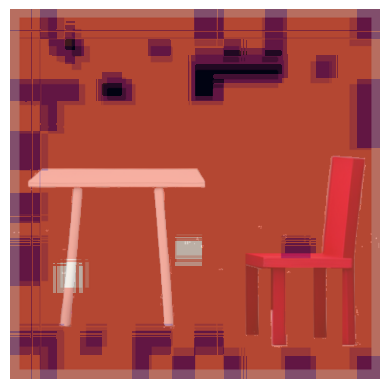

In [4]:
Attention.CLIP_embeddings(cross_attn, img)

In [5]:
HTML('<img src="../src/imgs/results/CLIP_cross_attention/cross_attn_Diffusion_chair.gif">')